## Ground Risk Model, Using Harm, Impact, Expsure, and Coridor

Importing common library

In [6]:
#Import Online
import geopandas as gpd
import pandas as pd
import numpy as np
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
# from upt.utils.geo_utils import line_smoothing as lsp

# import matplotlib.pyplot as plt
# JakUt = foi('Jakarta Utara',crs=3857,zoom_level=18)
# JakUt_building_area = JakUt.area_of_interest({'military':True,'aeroway':True,'building':True,})

In [7]:
from upt.utils.file_handle import FileHandle
fh = FileHandle("7626002_Jakarta Utara")
JakUt_true_area = fh.load_gdf("Jakarta Utara_calculated_military_True",fh.feature_dir)
# JakUt_overlayer = fh.load_gdf("Jakarta Utara_overlay_building_True",fh.feature_dir)

# Population Density Retrieval

why dont i just use gaussian function to do this

In [2]:
import geopandas
import rioxarray
import contextily
import datashader as ds
import matplotlib.pyplot as plt

url = ("https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2030_GLOBE_R2023A_54009_100/V1-0/tiles/GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.zip")
p = f"zip+{url}!GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.tif"

from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp

population_point_gdf  = foi.p_density(p)

In [5]:
p_dense = foi.pop_join(population_point_gdf, JakUt_true_area)
# fh.save_gdf(p_dense,"JakUt_popdense","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\Population Data")

NameError: name 'foi' is not defined

In [8]:
p_dense = fh.load_gdf("JakUt_popdense","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\Population Data")

<AxesSubplot: >

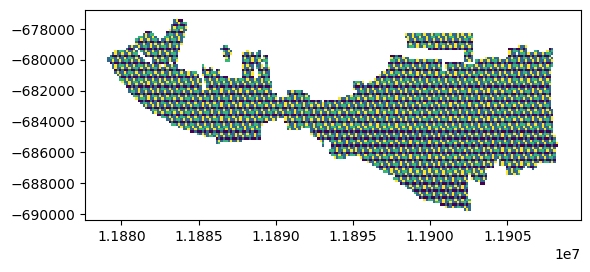

In [6]:
p_dense.plot(column="population")

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.switch_backend('pgf')

JakUt_true_dense.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
JakUt_true_dense.plot(column='pop_area_normal', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(JakUt_true_dense['pop_area_normal'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$people/m^2$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=JakUt_true_dense.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_population_true.pdf')


plt.show()

C:\Users\MICKO\AppData\Local\Temp\ipykernel_9376\2939058460.py:28: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [7]:
import contextily as ctx
import matplotlib.pyplot as plt

JakUt_true_dense.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
JakUt_true_dense.plot(column='pop_area_normal', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(JakUt_true_dense['pop_area_normal'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$people/m^2$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=JakUt_true_dense.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_population_true.pdf')


plt.show()

NameError: name 'JakUt_true_dense' is not defined

In [32]:
from upt.riskcalculator.model_area_exp import AreaExpose as ae

talon = {
    'mass':3.75,
    'front area':0.1,
    'diagonal size':0.88,
    'endurance':75,
    'cd':0.9,
    'cd parachute' : 1.3,
    'cruise speed':18,
    'glide speed':16,
    'glide descent angle': 4.76,
    'flight_lv': 100
}

disco = {
    'mass':0.75,
    'front area':0.07,
    'diagonal size':0.575,
    'endurance':45,
    'cd':0.9,
    'cd parachute' : 1.3,
    'cruise speed':15,
    'glide speed':12,
    'glide descent angle': 20.32,
    'flight_lv': 100
}

phantom4 = {
    'mass':1.4,
    'front area':0.02,
    'diagonal size':0.2,
    'endurance':20,
    'cd':0.7,
    'cd parachute' : 0.9,
    'cruise speed':15,
    'glide speed':7.5,
    'glide descent angle': 20.32,
    'flight_lv': 100
}

inspire2 = {
    'mass':4.25,
    'front area':0.04,
    'diagonal size':0.4,
    'endurance':25,
    'cd':0.7,
    'cd parachute' : 1.3,
    'cruise speed':20,
    'glide speed':10,
    'glide descent angle': 20.32,
    'flight_lv': 100
}
    

calc = ae(p_dense, inspire2)
pre_fatality_gdf = calc.run_function()

<AxesSubplot: >

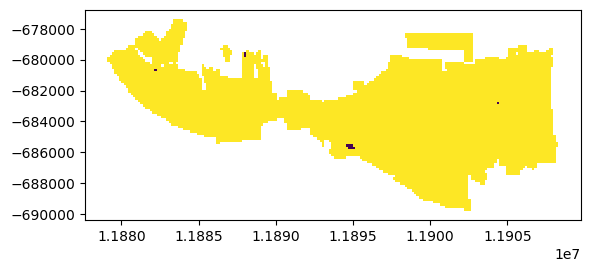

In [33]:
pre_fatality_gdf.plot(column="fly level score")

In [34]:
sim_descent = calc.sum_descent(inspire2,"bal")

Running Ballistic Model


C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),


Running Glide Model


C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no lo

Running Parachute Model


C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vectorized._affinity_method("translate", self.data, xoff, yoff, zoff),
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\array.py:652: ShapelyDeprecationWarning: The array interface is deprecated and will no lo

Running flyaway_mask Model


In [35]:
pre_descent_calculation = calc.applied_descent()
final_risk = calc.total_risk_score()

In [36]:
ballistic_impact = calc.ballistic_risk
glide_impact = calc.glide_risk
fly_away_impact = calc.flyaway_risk
parachute_impact = calc.parachute_risk
impact_gdf = calc.result_df.copy()

In [37]:
final_risk['ballistic risk'] = ballistic_impact
final_risk['glide risk'] = glide_impact
final_risk['flyaway risk'] = fly_away_impact
final_risk['parachute risk'] = parachute_impact

In [16]:
#Talon
fh.save_gdf(final_risk,"Talon Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [22]:
#disco
fh.save_gdf(final_risk,"Disco Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [30]:
#Phantom 4
fh.save_gdf(final_risk,"Phantom 4 Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [39]:
#Inspire 2
fh.save_gdf(final_risk,"Inspire 2 Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [59]:
final_risk = fh.load_gdf("Talon Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [61]:
final_risk.columns

Index(['geometry', 'quadkey', 'id', 'area', 'shelter factor', 'no fly zone',
       'height', 'population', 'pre fatality', 'impact score',
       'fly level score', 'fatality risk total', 'total risk', 'risk non inf',
       'ballistic risk', 'glide risk', 'flyaway risk'],
      dtype='object')

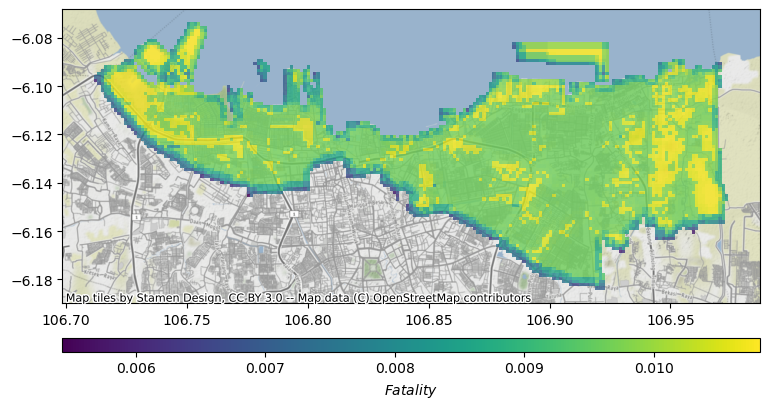

In [56]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='fatality risk total', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['fatality risk total'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$Fatality$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_population_true.pdf', bbox_inches='tight')


plt.show()

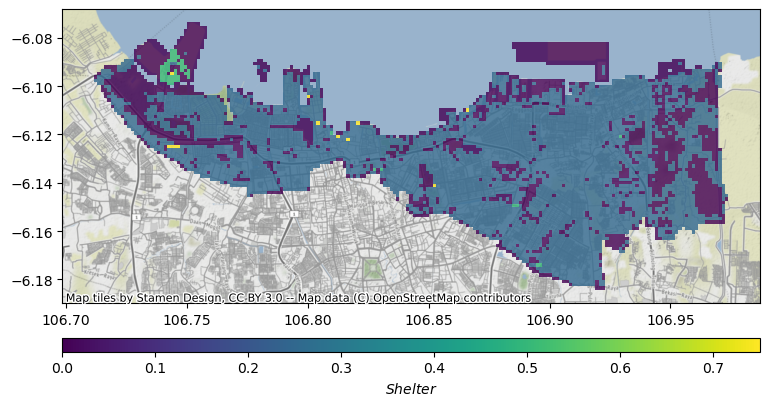

In [58]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='shelter factor', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['shelter factor'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$Shelter\ factor$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_shelter factor.pdf', bbox_inches='tight')


plt.show()

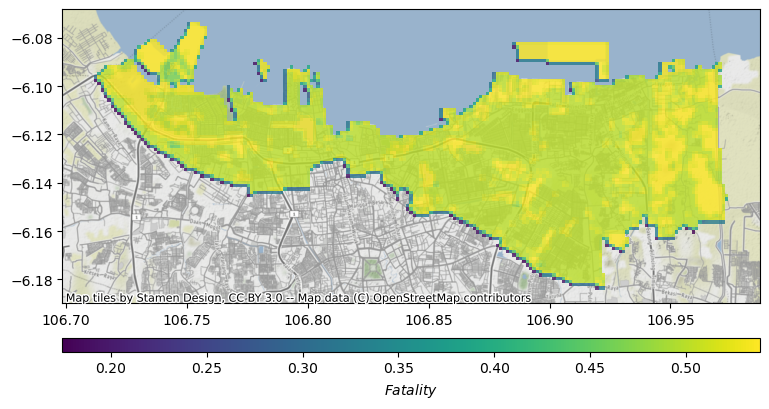

In [35]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='ballistic impact', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['ballistic impact'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$Ballistic impact probability$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_population_true.pdf', bbox_inches='tight')


plt.show()

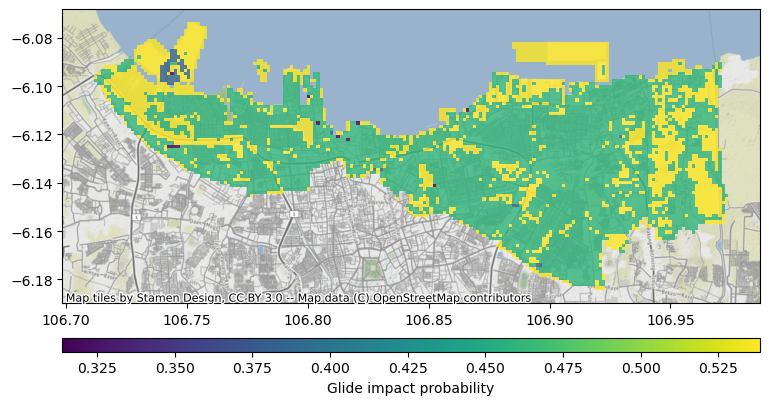

In [44]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='glide impact', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['glide impact'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="Glide impact probability")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
# plt.savefig('plot_population_true.pdf')


plt.show()

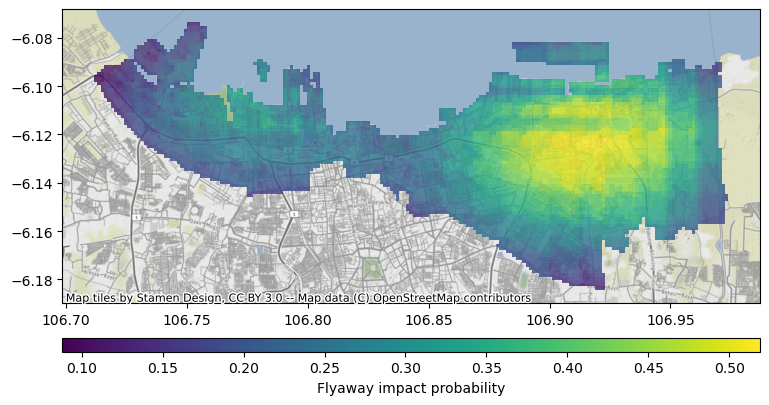

In [45]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='flyaway impact', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['flyaway impact'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="Flyaway impact probability")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
# plt.savefig('plot_population_true.pdf')


plt.show()

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
final_risk.plot(column='flyaway impact', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(final_risk['flyaway impact'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$Fatality$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=final_risk.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
# plt.savefig('plot_population_true.pdf')


plt.show()

In [147]:
import numpy as np

def fly_away_model(n_sampling, ac_profile, v_wind = 0 , wind_dir=0):
    wind_dir = np.deg2rad(wind_dir)
    v_wind_x = np.cos(wind_dir)*v_wind
    v_wind_y = np.sin(wind_dir)*v_wind
    glide_speed = ac_profile['glide speed']
    cruise_speed = ac_profile['cruise speed']
    endurance = ac_profile['endurance']*60
    
    sample_points = np.random.normal(cruise_speed, 3, size=(n_sampling))
    gamma = np.arctan(np.deg2rad(ac_profile['glide descent angle']))
    flight_lv = ac_profile['flight_lv']
    mass = ac_profile['mass']
    
    def fly_away(v_sample):
        point_list = []
        for v in v_sample:
            
            angle_degree = np.random.uniform(0,2*np.pi)
            
            radial_func_x = lambda angle : v*np.cos(angle)
            radial_func_y = lambda angle : v*np.sin(angle)
            
            vg_x = radial_func_x(angle_degree) + v_wind_x
            vg_y = radial_func_y(angle_degree) + v_wind_y
            v_magnitude = np.linalg.norm([vg_x,vg_y])
            
            range_max_x = endurance*(1/2)*vg_x
            range_max_y = endurance*(1/2)*vg_y
            
            flight_lv_dist = np.random.normal(flight_lv, 1)
            td = flight_lv_dist/v_magnitude*np.sin(gamma)
            
            angle_radians = np.arctan2(vg_y, vg_x)
            angle_radians = (angle_radians + 2*np.pi) % (2*np.pi)
            
            point_x = v_magnitude*td*np.cos(angle_radians)+range_max_x
            point_y = v_magnitude*td*np.sin(angle_radians)+range_max_y
            

            E_imp = 1/2*mass*v_magnitude**2
            point_list.append((point_x,point_y, E_imp))
        return (np.array(point_list))

    crash_point = fly_away(sample_points)
    crash_point = np.column_stack((crash_point))
    return(crash_point)

In [154]:
import numpy as np

def ballistic_model(n_sampling, ac_profile, v_wind = 0 , wind_dir=0):
    wind_dir = np.deg2rad(wind_dir)
    v_wind_x = np.cos(wind_dir)*v_wind
    v_wind_y = np.sin(wind_dir)*v_wind
    
    cruise_speed = ac_profile['cruise speed']
    flight_lv = ac_profile['flight_lv']
    cd = ac_profile['cd']
    mass = ac_profile['mass']

    g = 9.81
    weight = mass*g
    Gamma = np.sqrt(weight/cd)
    m_log2 = mass*np.log(2)
    
    sample_points = np.random.normal(cruise_speed, 3, size=(n_sampling))
    def ballistic(v_sample):
        point_list = []
        for v in v_sample:
            
            angle_degree = np.random.uniform(0,2*np.pi)
            
            radial_func_x = lambda angle : v*np.cos(angle)
            radial_func_y = lambda angle : v*np.sin(angle)
            
            vg_x = radial_func_x(angle_degree) + v_wind_x
            vg_y = radial_func_y(angle_degree) + v_wind_y
            v_magnitude = np.linalg.norm([vg_x,vg_y])
            
            flight_lv_dist = np.random.normal(flight_lv, 1)
            td = ((m_log2 + cd*flight_lv_dist)*Gamma)/weight
            
            angle_radians = np.arctan2(vg_y, vg_x)
            angle_radians = (angle_radians + 2*np.pi) % (2*np.pi)
            
            point_x = v_magnitude*td*np.cos(angle_radians)
            point_y = v_magnitude*td*np.sin(angle_radians)
            
            E_imp = 1/2*mass*v_magnitude**2
            point_list.append((point_x,point_y, E_imp))
        return (np.array(point_list))

    crash_point = ballistic(sample_points)
    crash_point = np.column_stack((crash_point))
    return(crash_point)

In [97]:
import numpy as np

def glide_model(n_sampling, ac_profile, v_wind = 0 , wind_dir=0):
    wind_dir = np.deg2rad(wind_dir)
    v_wind_x = np.cos(wind_dir)*v_wind
    v_wind_y = np.sin(wind_dir)*v_wind
    glide_speed = ac_profile['glide speed']
    
    sample_points = np.random.normal(glide_speed, 3, size=(n_sampling))
    gamma = np.arctan(np.deg2rad(ac_profile['glide descent angle']))
    flight_lv = ac_profile['flight_lv']
    mass = ac_profile['mass']
    
    def glide(v_sample):
        point_list = []
        for v in v_sample:
            
            angle_degree = np.random.uniform(0,2*np.pi)
            
            radial_func_x = lambda angle : v*np.cos(angle)
            radial_func_y = lambda angle : v*np.sin(angle)
            
            vg_x = radial_func_x(angle_degree) + v_wind_x
            vg_y = radial_func_y(angle_degree) + v_wind_y
            v_magnitude = np.linalg.norm([vg_x,vg_y])
            
            flight_lv_dist = np.random.normal(flight_lv, 1)
            td = flight_lv_dist/v_magnitude*np.sin(gamma)
            
            angle_radians = np.arctan2(vg_y, vg_x)
            angle_radians = (angle_radians + 2*np.pi) % (2*np.pi)
            
            point_x = v_magnitude*td*np.cos(angle_radians)
            point_y = v_magnitude*td*np.sin(angle_radians)

            E_imp = 1/2*mass*v_magnitude**2
            point_list.append((point_x,point_y, E_imp))
        return (np.array(point_list))

    crash_point = glide(sample_points)
    crash_point = np.column_stack((crash_point))
    return(crash_point)

In [155]:
talon = {
    'glide speed':50,
    'glide descent angle' : 20,
    'flight_lv':100,
    'mass':2.1,
    'cruise speed':10,
    'endurance':10,
    'cd': 0.002
}

ballistic_descent = ballistic_model(1000, talon, 10, 75)
fly_descent = fly_away_model(1000, talon, 50,  0)
glide_descent = glide_model(1000, talon, 10, 0)

# Geocoding

In [38]:
from upt.utils.file_handle import FileHandle
fh = FileHandle("7626002_Jakarta Utara")
talon_final_risk = fh.load_gdf("Talon Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

In [39]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="UAV Path Finder")

Start Point

In [47]:
location = geolocator.geocode("Pluit Village")
latitude = location.latitude
longitude = location.longitude

geometry = gpd.points_from_xy([longitude], [latitude])
start_point = gpd.GeoDataFrame(geometry=geometry)
start_point = start_point.set_crs("EPSG:4326")

End Point

In [48]:
location = geolocator.geocode("Sunter Mall")
latitude = location.latitude
longitude = location.longitude

geometry = gpd.points_from_xy([longitude], [latitude])
end_point = gpd.GeoDataFrame(geometry=geometry)
end_point = end_point.set_crs("EPSG:4326")

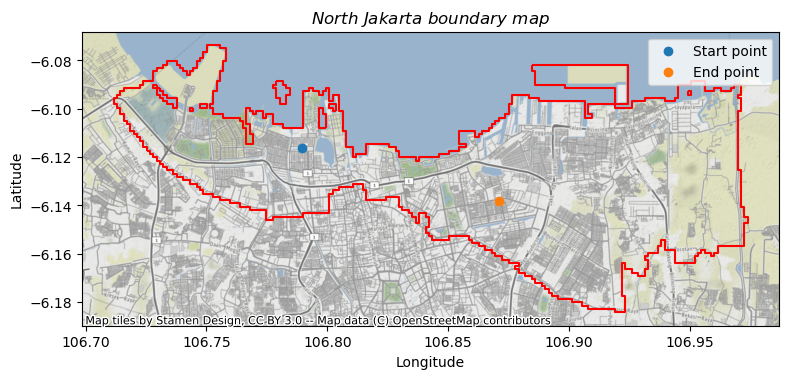

In [83]:
import contextily as ctx
import matplotlib.pyplot as plt

talon_final_risk.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
talon_final_risk.dissolve().boundary.plot(alpha=1, ax=ax,color="red")
start_point.plot(ax=ax, label="Start point")
end_point.plot(ax=ax, label="End point")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=talon_final_risk.crs, )
# Set the LaTeX font and other options (optional)


ax.set_title('$North\ Jakarta\ boundary\ map$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Save the plot as a PGF file
# plt.savefig('plot_population_true.pdf')

plt.legend()
plt.show()

In [ ]:
end_gdf = end_point.sjoin(talon_final_risk)

# PathFinder

In [12]:
import geopandas as gpd
import pandas as pd
import numpy as np
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
# from upt.utils.geo_utils import line_smoothing 

In [3]:
talon_final_risk.columns

Index(['geometry', 'quadkey', 'id', 'area', 'shelter factor', 'no fly zone',
       'height', 'population', 'pre fatality', 'impact score',
       'fly level score', 'fatality risk total', 'total risk', 'risk non inf',
       'ballistic risk', 'glide risk', 'flyaway risk'],
      dtype='object')

# Astar

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


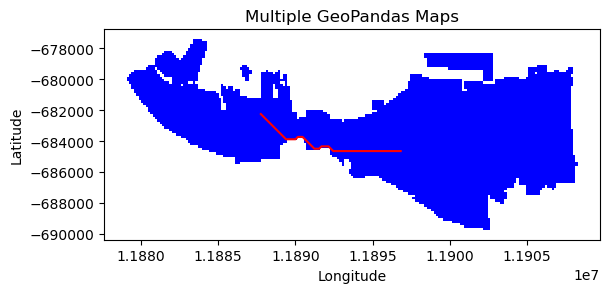

In [10]:
astar = AStar(talon_final_risk,'fatality risk total',crs=talon_final_risk.crs)
astar.run_instance("Pluit Village","Sunter Mall")
way_marker = astar.create_line()

from upt.postprocessor.line_smoothing import non_smooth
gpd_proccessed = non_smooth(way_marker, talon_final_risk.crs)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the first map
talon_final_risk.plot(ax=ax, color='blue')

# Plot the second map on top
gpd_proccessed.plot(ax=ax, color='red')

# Set any additional customization options for the plot
ax.set_title('Multiple GeoPandas Maps')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

In [9]:
line_sjoin = gpd_proccessed.sjoin(talon_final_risk, how="left" )

# Risk ASTAR

In [2]:
from upt.utils.file_handle import FileHandle
fh = FileHandle("7626002_Jakarta Utara")
talon_final_risk = fh.load_gdf("Talon Final_risk","D:\\TUGAS SEKOLAH\\College\\Smst 7, Odd 2023\\UAV PATH PLANNER\\city_data\\7626002_Jakarta Utara")

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


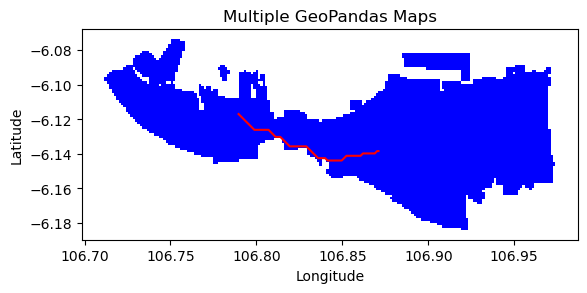

In [35]:
import geopandas as gpd
import pandas as pd
import numpy as np
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar

astar = AStar(talon_final_risk,'fatality risk total',crs=talon_final_risk.crs, custom_func="Risk ASTAR")
astar.run_instance("Pluit Village","Sunter Mall")
way_marker = astar.create_line()

from upt.postprocessor.line_smoothing import non_smooth
gpd_proccessed = non_smooth(way_marker, talon_final_risk.crs)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the first map
talon_final_risk.to_crs("epsg:4326").plot(ax=ax, color='blue')

# Plot the second map on top
gpd_proccessed.to_crs("epsg:4326").plot(ax=ax, color='red')

# Set any additional customization options for the plot
ax.set_title('Multiple GeoPandas Maps')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

In [18]:
line_travel=gpd_proccessed.sjoin(talon_final_risk)

In [21]:
line_travel.reset_index(inplace=True)

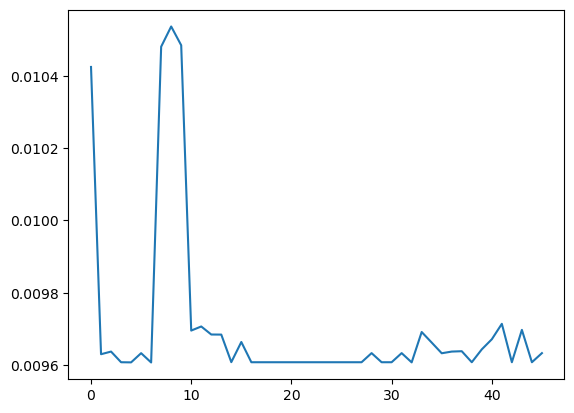

In [23]:
plt.plot(line_travel['fatality risk total'])